# Payment Date Prediction

Done By --> Jairam.S.J.A

In [1]:
#Import all necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings(action="ignore")

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df=pd.read_csv('H2HBABBA3161.csv')

In [3]:
#Displays first 5 rows in dataframe
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200744019,TARG trust,NaN,2020.0,1.930793e+09,2020-04-17,20200416,20200417,20200502.0,USD,RV,1.0,NaN,34836.09,20200417.0,NAA8,1.930793e+09,1
1,CA02,0140106293,ATLANT,2019-12-16 00:00:00,2019.0,2.960594e+09,2019-11-21,20191121,20191121,20191209.0,CAD,RV,1.0,NaN,84348.04,20191129.0,CA10,2.960594e+09,0
2,U001,200799367,MCL llc,2019-04-05 00:00:00,2019.0,1.928962e+09,2019-03-21,20190314,20190321,20190405.0,USD,RV,1.0,NaN,6153.23,20190321.0,NAA8,1.928962e+09,0
3,U001,0200794332,COST in,NaN,2020.0,1.930594e+09,2020-03-04,20200303,20200304,20200319.0,USD,RV,1.0,NaN,8793.09,20200304.0,NAAX,1.930594e+09,1
4,U001,0200881076,ALBERT foundation,2019-05-23 00:00:00,2019.0,1.929271e+09,2019-05-08,20190507,20190508,20190523.0,USD,RV,1.0,NaN,75415.34,20190508.0,NAA8,1.929271e+09,0


In [4]:
#Dimensions of dataframe
df.shape

(50000, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
business_code             50000 non-null object
cust_number               50000 non-null object
name_customer             50000 non-null object
clear_date                40000 non-null object
buisness_year             50000 non-null float64
doc_id                    50000 non-null float64
posting_date              50000 non-null object
document_create_date      50000 non-null int64
document_create_date.1    50000 non-null int64
due_in_date               50000 non-null float64
invoice_currency          50000 non-null object
document type             50000 non-null object
posting_id                50000 non-null float64
area_business             0 non-null float64
total_open_amount         50000 non-null float64
baseline_create_date      50000 non-null float64
cust_payment_terms        50000 non-null object
invoice_id                49996 non-null float64
isOpen                   

In [6]:
#Displays no. of unique items in each column
df.nunique()

business_code                 6
cust_number                1399
name_customer              4116
clear_date                  400
buisness_year                 2
doc_id                    48803
posting_date                502
document_create_date        504
document_create_date.1      502
due_in_date                 542
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         44345
baseline_create_date        503
cust_payment_terms           73
invoice_id                48799
isOpen                        2
dtype: int64

In [7]:
#All the items are null values, so remove it
df.drop('area_business', axis=1, inplace=True)

In [8]:
#It is a constant column with a single value, so it's of no use
df.drop('posting_id', axis=1, inplace=True)

In [9]:
#Drop either of 'document_create_date' or 'document_create_date.1'
df.drop('document_create_date.1', axis=1, inplace=True)

In [10]:
#Check for duplicated rows
df[df.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1538,U001,0200799367,MCL in,NaN,2020.0,1.930721e+09,2020-03-31,20200330,20200415.0,USD,RV,124605.44,20200331.0,NAA8,1.930721e+09,1
1799,U001,0200769623,WAL-MAR in,2019-07-19 00:00:00,2019.0,1.929581e+09,2019-07-08,20190706,20190723.0,USD,RV,12823.01,20190708.0,NAH4,1.929581e+09,0
1966,U001,0200974851,RESTA associates,2019-02-13 00:00:00,2019.0,1.928679e+09,2019-01-24,20190124,20190213.0,USD,RV,240.81,20190124.0,NAD1,1.928679e+09,0
1969,CA02,0140104409,LOB corp,2019-05-14 00:00:00,2019.0,2.960544e+09,2019-05-07,20190507,20190517.0,CAD,RV,21.18,20190507.0,CAX2,2.960544e+09,0
2088,U001,0200769623,WAL-MAR corp,NaN,2020.0,1.930651e+09,2020-03-14,20200314,20200329.0,USD,RV,19597.80,20200314.0,NAH4,1.930651e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49921,U001,0200735528,ASSOCIA,2019-09-23 00:00:00,2019.0,1.929830e+09,2019-09-06,20190905,20190921.0,USD,RV,123028.51,20190906.0,NAA8,1.929830e+09,0
49934,U001,0100031704,DELHAIZE in,2019-04-29 00:00:00,2019.0,1.929133e+09,2019-04-12,20190411,20190427.0,USD,RV,110674.25,20190412.0,NAA8,1.929133e+09,0
49947,U001,0200762301,C&S WH foundation,2019-11-15 00:00:00,2019.0,1.930077e+09,2019-10-31,20191031,20191115.0,USD,RV,128617.82,20191031.0,NAC6,1.930077e+09,0
49955,U001,0200769623,WAL-MAR,2019-11-27 00:00:00,2019.0,1.930158e+09,2019-11-15,20191115,20191130.0,USD,RV,46814.61,20191115.0,NAH4,1.930158e+09,0


In [11]:
#Drop the duplicated rows
df.drop_duplicates(inplace = True)

In [12]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200744019,TARG trust,NaN,2020.0,1.930793e+09,2020-04-17,20200416,20200502.0,USD,RV,34836.09,20200417.0,NAA8,1.930793e+09,1
1,CA02,0140106293,ATLANT,2019-12-16 00:00:00,2019.0,2.960594e+09,2019-11-21,20191121,20191209.0,CAD,RV,84348.04,20191129.0,CA10,2.960594e+09,0
2,U001,200799367,MCL llc,2019-04-05 00:00:00,2019.0,1.928962e+09,2019-03-21,20190314,20190405.0,USD,RV,6153.23,20190321.0,NAA8,1.928962e+09,0
3,U001,0200794332,COST in,NaN,2020.0,1.930594e+09,2020-03-04,20200303,20200319.0,USD,RV,8793.09,20200304.0,NAAX,1.930594e+09,1
4,U001,0200881076,ALBERT foundation,2019-05-23 00:00:00,2019.0,1.929271e+09,2019-05-08,20190507,20190523.0,USD,RV,75415.34,20190508.0,NAA8,1.929271e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200020431,DEC associates,2019-05-16 00:00:00,2019.0,1.929279e+09,2019-05-08,20190508,20190524.0,USD,RV,139.32,20190501.0,NAM4,1.929279e+09,0
49996,U001,0200769623,WAL-MAR systems,2019-12-24 00:00:00,2019.0,1.930278e+09,2019-12-13,20191213,20191228.0,USD,RV,32950.51,20191213.0,NAH4,1.930278e+09,0
49997,U001,0200759878,SA co,2019-10-25 00:00:00,2019.0,1.929995e+09,2019-10-10,20191010,20191025.0,USD,RV,26018.59,20191010.0,NAH4,1.929995e+09,0
49998,CA02,0140104392,FLANAG llc,NaN,2020.0,2.960619e+09,2020-03-06,20200306,20200320.0,CAD,RV,14869.54,20200310.0,CA10,2.960619e+09,1


In [13]:
#Check for null values in dataframe
df.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9703
buisness_year              0
doc_id                     0
posting_date               0
document_create_date       0
due_in_date                0
invoice_currency           0
document type              0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
invoice_id                 4
isOpen                     0
dtype: int64

## Date conversion

In [14]:
df['clear_date']=pd.to_datetime(df['clear_date'])

In [15]:
df['buisness_year']=pd.to_datetime(df['buisness_year'],format="%Y")
df['buisness_year']=df.buisness_year.dt.year

In [16]:
df['posting_date']=pd.to_datetime(df['posting_date'])

In [17]:
df['document_create_date']=pd.to_datetime(df['document_create_date'],format="%Y%m%d")

In [18]:
df['due_in_date']=pd.to_datetime(df['due_in_date'],format="%Y%m%d")

In [19]:
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'],format="%Y%m%d")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48803 entries, 0 to 49999
Data columns (total 16 columns):
business_code           48803 non-null object
cust_number             48803 non-null object
name_customer           48803 non-null object
clear_date              39100 non-null datetime64[ns]
buisness_year           48803 non-null int64
doc_id                  48803 non-null float64
posting_date            48803 non-null datetime64[ns]
document_create_date    48803 non-null datetime64[ns]
due_in_date             48803 non-null datetime64[ns]
invoice_currency        48803 non-null object
document type           48803 non-null object
total_open_amount       48803 non-null float64
baseline_create_date    48803 non-null datetime64[ns]
cust_payment_terms      48803 non-null object
invoice_id              48799 non-null float64
isOpen                  48803 non-null int64
dtypes: datetime64[ns](5), float64(3), int64(2), object(6)
memory usage: 6.3+ MB


### Removing anomalies

In [21]:
# The 'clear_date' should always be greater than the date 
# on which the invoice was created, or else, it won't make sense...
df[df['clear_date']<df['baseline_create_date']].shape

(4, 16)

In [22]:
df.drop(df[df['clear_date']<df['baseline_create_date']].index,index=None,inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48799 entries, 0 to 49999
Data columns (total 16 columns):
business_code           48799 non-null object
cust_number             48799 non-null object
name_customer           48799 non-null object
clear_date              39096 non-null datetime64[ns]
buisness_year           48799 non-null int64
doc_id                  48799 non-null float64
posting_date            48799 non-null datetime64[ns]
document_create_date    48799 non-null datetime64[ns]
due_in_date             48799 non-null datetime64[ns]
invoice_currency        48799 non-null object
document type           48799 non-null object
total_open_amount       48799 non-null float64
baseline_create_date    48799 non-null datetime64[ns]
cust_payment_terms      48799 non-null object
invoice_id              48795 non-null float64
isOpen                  48799 non-null int64
dtypes: datetime64[ns](5), float64(3), int64(2), object(6)
memory usage: 6.3+ MB


In [24]:
df.drop('document type', axis=1, inplace=True)

In [25]:
#Custom encoding is done here to store the unique values of certain columns, so that,it can be used later
#And also, they need not be mapped and stored in dataframe for now...
cust_id_dict={}
x=0
for i in list(df.name_customer.unique()):
    cust_id_dict[i]=x
    x=x+1

len(cust_id_dict)

4115

In [26]:
payment_terms_dict={}
x=0
for i in list(df.cust_payment_terms.unique()):
    payment_terms_dict[i]=x
    x=x+1

len(payment_terms_dict)

73

In [27]:
#Copy all rows which have nan values in clear_date column to another dataframe and then drop it from dataset

test_df = df[df['clear_date'].isna()]

df.dropna(axis=0, how='any', inplace=True)

In [28]:
#Sort the datframe according to the 'posting_date'
df.sort_values(by='posting_date',inplace=True,ascending=True)

In [29]:
df.reset_index(drop=True)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200799367,MCL,2019-01-18,2019,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,USD,94904.14,2018-12-30,NAA8,1.928541e+09,0
1,U001,CCU013,KRAFT F llc,2019-03-01,2019,1.928533e+09,2018-12-30,2018-12-31,2018-12-30,USD,58296.03,2018-12-30,NAX2,1.928533e+09,0
2,U001,0200706844,WINC corp,2019-01-15,2019,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,2958.38,2018-12-30,NAA8,1.928543e+09,0
3,U001,0200769623,WAL-MAR corp,2019-01-09,2019,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,USD,14548.67,2018-12-30,NAH4,1.928541e+09,0
4,U001,0200759878,SA,2019-01-15,2019,1.928533e+09,2018-12-30,2018-12-29,2019-01-14,USD,13891.01,2018-12-30,NAH4,1.928533e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39087,U001,0200759878,SA corp,2020-03-13,2020,1.930574e+09,2020-02-27,2020-02-26,2020-03-13,USD,49290.19,2020-02-27,NAH4,1.930574e+09,0
39088,U001,0200744019,TARG foundation,2020-03-10,2020,1.930572e+09,2020-02-27,2020-02-26,2020-03-13,USD,18132.90,2020-02-27,NAA8,1.930572e+09,0
39089,U001,0200126819,MCLANE in,2020-03-18,2020,1.930581e+09,2020-02-27,2020-02-28,2020-03-13,USD,17304.60,2020-02-27,NAA8,1.930581e+09,0
39090,U001,0200290370,BARGAIN corp,2020-03-16,2020,1.930577e+09,2020-02-27,2020-02-27,2020-03-13,USD,3599.97,2020-02-27,NAA8,1.930577e+09,0


In [30]:
#Find the no. of days elapsed after the due date (-ve value for early payment)

df['target'] = (df['clear_date']-df['due_in_date']).dt.days

In [31]:
#Find the difference between due date and document create date
df['time_period'] = (df['due_in_date']-df['document_create_date']).dt.days

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39092 entries, 37121 to 7589
Data columns (total 17 columns):
business_code           39092 non-null object
cust_number             39092 non-null object
name_customer           39092 non-null object
clear_date              39092 non-null datetime64[ns]
buisness_year           39092 non-null int64
doc_id                  39092 non-null float64
posting_date            39092 non-null datetime64[ns]
document_create_date    39092 non-null datetime64[ns]
due_in_date             39092 non-null datetime64[ns]
invoice_currency        39092 non-null object
total_open_amount       39092 non-null float64
baseline_create_date    39092 non-null datetime64[ns]
cust_payment_terms      39092 non-null object
invoice_id              39092 non-null float64
isOpen                  39092 non-null int64
target                  39092 non-null int64
time_period             39092 non-null int64
dtypes: datetime64[ns](5), float64(3), int64(4), object(5)
memory u

In [33]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,target,time_period
37121,U001,0200799367,MCL,2019-01-18,2019,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,USD,94904.14,2018-12-30,NAA8,1.928541e+09,0,4,16
36165,U001,CCU013,KRAFT F llc,2019-03-01,2019,1.928533e+09,2018-12-30,2018-12-31,2018-12-30,USD,58296.03,2018-12-30,NAX2,1.928533e+09,0,61,-1
6771,U001,0200706844,WINC corp,2019-01-15,2019,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,2958.38,2018-12-30,NAA8,1.928543e+09,0,1,15
755,U001,0200769623,WAL-MAR corp,2019-01-09,2019,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,USD,14548.67,2018-12-30,NAH4,1.928541e+09,0,-5,16
46986,U001,0200759878,SA,2019-01-15,2019,1.928533e+09,2018-12-30,2018-12-29,2019-01-14,USD,13891.01,2018-12-30,NAH4,1.928533e+09,0,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46400,U001,0200759878,SA corp,2020-03-13,2020,1.930574e+09,2020-02-27,2020-02-26,2020-03-13,USD,49290.19,2020-02-27,NAH4,1.930574e+09,0,0,16
32717,U001,0200744019,TARG foundation,2020-03-10,2020,1.930572e+09,2020-02-27,2020-02-26,2020-03-13,USD,18132.90,2020-02-27,NAA8,1.930572e+09,0,-3,16
44489,U001,0200126819,MCLANE in,2020-03-18,2020,1.930581e+09,2020-02-27,2020-02-28,2020-03-13,USD,17304.60,2020-02-27,NAA8,1.930581e+09,0,5,14
37156,U001,0200290370,BARGAIN corp,2020-03-16,2020,1.930577e+09,2020-02-27,2020-02-27,2020-03-13,USD,3599.97,2020-02-27,NAA8,1.930577e+09,0,3,15


## Split the data into train and validation sets

In [34]:
train, val = train_test_split(df, test_size=0.3, shuffle=False, random_state=0)

In [35]:
train.shape, val.shape

((27364, 17), (11728, 17))

In [36]:
train.nunique()

business_code               6
cust_number              1206
name_customer            3303
clear_date                286
buisness_year               1
doc_id                  27364
posting_date              283
document_create_date      291
due_in_date               342
invoice_currency            2
total_open_amount       25225
baseline_create_date      292
cust_payment_terms         63
invoice_id              27364
isOpen                      1
target                    175
time_period               102
dtype: int64

In [37]:
train.describe()

,buisness_year,doc_id,total_open_amount,invoice_id,isOpen,target,time_period
count,27364.0,2.736400e+04,27364.000000,2.736400e+04,27364.0,27364.000000,27364.000000
mean,2019.0,2.012852e+09,31936.095209,2.012852e+09,0.0,1.103201,18.316767
std,0.0,2.795734e+08,39222.299195,2.795734e+08,0.0,11.329568,11.349263
min,2019.0,1.928502e+09,0.650000,1.928502e+09,0.0,-78.000000,-108.000000
25%,2019.0,1.928991e+09,4614.870000,1.928991e+09,0.0,-3.000000,15.000000
50%,2019.0,1.929415e+09,17193.705000,1.929415e+09,0.0,0.000000,16.000000
75%,2019.0,1.929767e+09,46588.992500,1.929767e+09,0.0,2.000000,17.000000
max,2019.0,2.960585e+09,594540.260000,2.960585e+09,0.0,314.000000,120.000000


In [38]:
train.drop('buisness_year',axis=1,inplace=True)

train.drop('isOpen',axis=1,inplace=True)

### Check for Correlation between numerical columns

(5.0, 0.0)

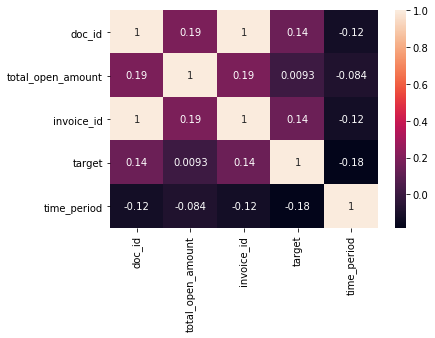

In [39]:
numerical_columns=train.select_dtypes(include=np.number).columns.tolist()

correlation=train.corr()
plt.subplots()
hm=sns.heatmap(correlation,annot=True)
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)

We can see here that the 'doc_id' and 'invoice_id' columns are highly correlated....Hence, they must be removed

In [40]:
train.drop('doc_id',axis=1,inplace=True)

train.drop('invoice_id',axis=1,inplace=True)

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27364 entries, 37121 to 1878
Data columns (total 13 columns):
business_code           27364 non-null object
cust_number             27364 non-null object
name_customer           27364 non-null object
clear_date              27364 non-null datetime64[ns]
posting_date            27364 non-null datetime64[ns]
document_create_date    27364 non-null datetime64[ns]
due_in_date             27364 non-null datetime64[ns]
invoice_currency        27364 non-null object
total_open_amount       27364 non-null float64
baseline_create_date    27364 non-null datetime64[ns]
cust_payment_terms      27364 non-null object
target                  27364 non-null int64
time_period             27364 non-null int64
dtypes: datetime64[ns](5), float64(1), int64(2), object(5)
memory usage: 2.9+ MB


### Graph for Day_of_the_week vs Delay

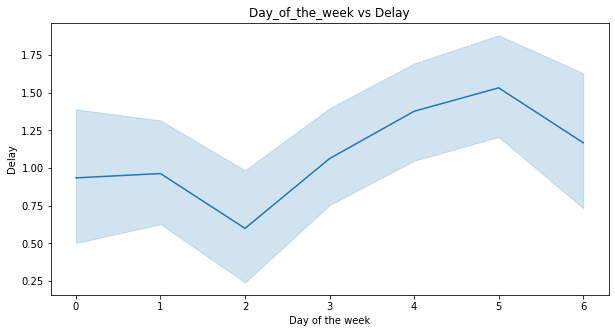

In [42]:
plt.figure(figsize=(10,5))
sns.lineplot(x=train["due_in_date"].dt.dayofweek, y=train.target)
plt.xlabel("Day of the week")
plt.ylabel("Delay")
plt.title("Day_of_the_week vs Delay")
plt.show()

## Feature Engineering

In [43]:
train['due_month'] = train['due_in_date'].dt.month
val['due_month'] = val['due_in_date'].dt.month

In [44]:
train['due_day'] = train['due_in_date'].dt.dayofweek
val['due_day'] = val['due_in_date'].dt.dayofweek

In [45]:
train.nunique()

business_code               6
cust_number              1206
name_customer            3303
clear_date                286
posting_date              283
document_create_date      291
due_in_date               342
invoice_currency            2
total_open_amount       25225
baseline_create_date      292
cust_payment_terms         63
target                    175
time_period               102
due_month                  12
due_day                     7
dtype: int64

### Using LabelEncoder and OrdinalEncoder for encoding the unique values

In [46]:
currencyLabelEncoder = LabelEncoder() 
train["invoice_currency"] = currencyLabelEncoder.fit_transform(train["invoice_currency"])
val["invoice_currency"] = currencyLabelEncoder.transform(val["invoice_currency"])

In [47]:
businessOrdinalEncoder = OrdinalEncoder()
train["business_code"] = businessOrdinalEncoder.fit_transform(train[["business_code"]])
val["business_code"] = businessOrdinalEncoder.transform(val[["business_code"]])

In [48]:
#Using the dictionary created earlier for encoding the values
train['customer_id'] = train['name_customer'].apply(lambda x: cust_id_dict.get(x))
val['customer_id'] = val['name_customer'].apply(lambda x: cust_id_dict.get(x))

In [49]:
train['payment_terms_id'] = train['cust_payment_terms'].apply(lambda x: payment_terms_dict.get(x))
val['payment_terms_id'] = val['cust_payment_terms'].apply(lambda x: payment_terms_dict.get(x))

(0, 9)

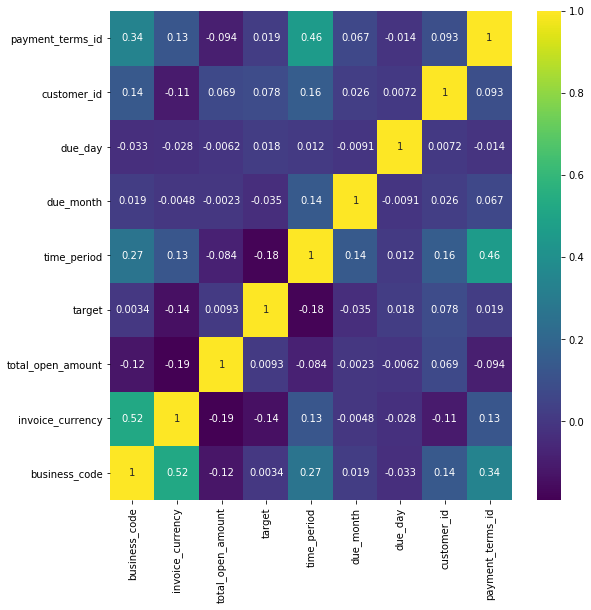

In [50]:
plt.figure(figsize=(9,9))
cor = train.corr()
cp=sns.heatmap(cor,cmap = 'viridis',annot=True)
bottom1, top1 = hm.get_ylim()
cp.set_ylim(0,9 )

In [51]:
X_train = train[['customer_id', 'total_open_amount', 'payment_terms_id', 'due_day', 'time_period', 'invoice_currency']]
y_train = train['target']

In [52]:
X = val[['customer_id', 'total_open_amount', 'payment_terms_id', 'due_day', 'time_period', 'invoice_currency']]
y = val['target']

In [53]:
X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)

Thus, the size of (train, val, test) sets -->   train - 70% , val - 15% , test - 15%

# Random Forest Regression

In [54]:
rf_reg = RandomForestRegressor(n_estimators=500, max_depth=8, n_jobs=-1)

In [55]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [56]:
y_predict = rf_reg.predict(X_val)

MSE value:

In [57]:
metrics.mean_squared_error(y_val, y_predict) 

24.926395280178266

## XGBoost Regression

In [58]:
import xgboost as xgb
cl = xgb.XGBRegressor()

In [59]:
cl.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [60]:
y_predict2 = cl.predict(X_val)

MSE value:

In [61]:
metrics.mean_squared_error(y_val, y_predict2) 

28.271730488195544

## Hyper-Parameter Tuning

We will continue to use Random Forest Regression as it gives better accuracy

In [62]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5,7,8,10],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 400, 500, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [63]:
#grid_search.fit(X_train, y_train)

In [225]:
#grid_search.best_params_

{'max_depth': 10,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 100}

In [228]:
#grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

## Random Forest Regression  after Hyper-Parameter Tuning

In [64]:
rf_regressor = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

rf_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [65]:
y_predict_hpt = rf_regressor.predict(X_val)

MAE value:

In [66]:
metrics.mean_absolute_error(y_val, y_predict_hpt)

2.839855800072986

MSE value:

In [67]:
metrics.mean_squared_error(y_val, y_predict_hpt)

24.523384018505855

R-squared score:

In [68]:
metrics.r2_score(y_val, y_predict_hpt)

0.45955996285137424

RMSE value:

In [69]:
np.sqrt(metrics.mean_squared_error(y_val, y_predict_hpt))

4.952109047517618

## Using test set 

In [70]:
rf_regressor1 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

rf_regressor1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [71]:
y_predict_test = rf_regressor1.predict(X_test)

In [72]:
metrics.mean_squared_error(y_test, y_predict_test)

59.18679477582934

In [73]:
np.sqrt(metrics.mean_squared_error(y_test, y_predict_test))

7.693295443165389

## Predicting clearing dates 

### For test_df (dataframe with NaN values for 'clear_date' column)

In [74]:
test_df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200744019,TARG trust,NaT,2020,1.930793e+09,2020-04-17,2020-04-16,2020-05-02,USD,34836.09,2020-04-17,NAA8,1.930793e+09,1
3,U001,0200794332,COST in,NaT,2020,1.930594e+09,2020-03-04,2020-03-03,2020-03-19,USD,8793.09,2020-03-04,NAAX,1.930594e+09,1
6,CA02,0140104429,COSTCO,NaT,2020,2.960623e+09,2020-03-20,2020-03-20,2020-03-30,CAD,32301.31,2020-03-20,CA10,2.960623e+09,1
7,U001,0200712105,WALG,NaT,2020,1.930760e+09,2020-04-07,2020-04-07,2020-04-22,USD,74881.86,2020-04-07,NAA8,1.930760e+09,1
12,U001,0200230690,DECA associates,NaT,2020,1.930586e+09,2020-03-02,2020-03-02,2020-03-24,USD,238.44,2020-03-01,NAM4,1.930586e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49969,U001,0200762301,C&S WH associates,NaT,2020,1.930841e+09,2020-05-01,2020-04-30,2020-05-16,USD,4886.81,2020-05-01,NAC6,1.930841e+09,1
49971,U001,0200782001,GORDO associates,NaT,2020,1.930580e+09,2020-02-27,2020-02-27,2020-03-13,USD,21863.80,2020-02-27,NAA8,1.930580e+09,1
49978,U001,0200705742,DOT co,NaT,2020,1.930653e+09,2020-03-15,2020-03-15,2020-03-30,USD,5900.00,2020-03-15,NAA8,1.930653e+09,1
49980,U001,0200714710,SYSCO,NaT,2020,1.930643e+09,2020-03-17,2020-03-12,2020-04-01,USD,152.41,2020-03-17,NAA8,1.930643e+09,1


In [75]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9703 entries, 0 to 49998
Data columns (total 15 columns):
business_code           9703 non-null object
cust_number             9703 non-null object
name_customer           9703 non-null object
clear_date              0 non-null datetime64[ns]
buisness_year           9703 non-null int64
doc_id                  9703 non-null float64
posting_date            9703 non-null datetime64[ns]
document_create_date    9703 non-null datetime64[ns]
due_in_date             9703 non-null datetime64[ns]
invoice_currency        9703 non-null object
total_open_amount       9703 non-null float64
baseline_create_date    9703 non-null datetime64[ns]
cust_payment_terms      9703 non-null object
invoice_id              9703 non-null float64
isOpen                  9703 non-null int64
dtypes: datetime64[ns](5), float64(3), int64(2), object(5)
memory usage: 1.2+ MB


### Creating all the necessary columns required for prediction

In [76]:
test_df['customer_id'] = test_df['name_customer'].apply(lambda x: cust_id_dict.get(x))

In [77]:
test_df['payment_terms_id'] = test_df['cust_payment_terms'].apply(lambda x: payment_terms_dict.get(x))

In [78]:
test_df['due_day'] = test_df['due_in_date'].dt.dayofweek

In [79]:
test_df['time_period'] = (test_df['due_in_date'] - test_df['document_create_date']).dt.days

In [80]:
test_df["invoice_currency"] = currencyLabelEncoder.transform(test_df["invoice_currency"])

In [81]:
test_df.drop('isOpen', axis=1, inplace=True)

In [82]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9703 entries, 0 to 49998
Data columns (total 18 columns):
business_code           9703 non-null object
cust_number             9703 non-null object
name_customer           9703 non-null object
clear_date              0 non-null datetime64[ns]
buisness_year           9703 non-null int64
doc_id                  9703 non-null float64
posting_date            9703 non-null datetime64[ns]
document_create_date    9703 non-null datetime64[ns]
due_in_date             9703 non-null datetime64[ns]
invoice_currency        9703 non-null int32
total_open_amount       9703 non-null float64
baseline_create_date    9703 non-null datetime64[ns]
cust_payment_terms      9703 non-null object
invoice_id              9703 non-null float64
customer_id             9703 non-null int64
payment_terms_id        9703 non-null int64
due_day                 9703 non-null int64
time_period             9703 non-null int64
dtypes: datetime64[ns](5), float64(3), int32(1),

In [83]:
X_final_pred = test_df[X_test.keys()]
y_final_pred = rf_regressor1.predict(X_final_pred)

In [84]:
from datetime import timedelta

target = np.array([timedelta(i) for i in y_final_pred]).reshape(-1,1)
test_df["predicted_clear_date"] = test_df[["due_in_date"]] + target

In [85]:
test_df['predicted_clear_date'] = test_df['predicted_clear_date'].dt.date

In [86]:
test_df['predicted_clear_date'] = pd.to_datetime(test_df['predicted_clear_date'])

In [87]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9703 entries, 0 to 49998
Data columns (total 19 columns):
business_code           9703 non-null object
cust_number             9703 non-null object
name_customer           9703 non-null object
clear_date              0 non-null datetime64[ns]
buisness_year           9703 non-null int64
doc_id                  9703 non-null float64
posting_date            9703 non-null datetime64[ns]
document_create_date    9703 non-null datetime64[ns]
due_in_date             9703 non-null datetime64[ns]
invoice_currency        9703 non-null int32
total_open_amount       9703 non-null float64
baseline_create_date    9703 non-null datetime64[ns]
cust_payment_terms      9703 non-null object
invoice_id              9703 non-null float64
customer_id             9703 non-null int64
payment_terms_id        9703 non-null int64
due_day                 9703 non-null int64
time_period             9703 non-null int64
predicted_clear_date    9703 non-null datetime64

In [88]:
test_df['target'] = (test_df['predicted_clear_date'] - test_df['due_in_date']).dt.days

## Aging Bucket

In [89]:
# Creating an aging bucket to categorize the rows according to the payment delay

test_df["aging_bucket"] = pd.cut(y_final_pred, [float("-inf"),0.,15.,30.,45.,60.,float("inf")],
                                 labels=["Less than 0","0-15","16-30","31-45","46-60","Greater than 60"])

In [90]:
test_df['aging_bucket'].value_counts()

0-15               5925
Less than 0        3698
31-45                45
16-30                21
46-60                14
Greater than 60       0
Name: aging_bucket, dtype: int64

In [91]:
test_df.drop('clear_date', axis = 1, inplace = True)

In [92]:
test_df

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,customer_id,payment_terms_id,due_day,time_period,predicted_clear_date,target,aging_bucket
0,U001,0200744019,TARG trust,2020,1.930793e+09,2020-04-17,2020-04-16,2020-05-02,1,34836.09,2020-04-17,NAA8,1.930793e+09,0,0,5,16,2020-05-04,2,0-15
3,U001,0200794332,COST in,2020,1.930594e+09,2020-03-04,2020-03-03,2020-03-19,1,8793.09,2020-03-04,NAAX,1.930594e+09,3,2,3,16,2020-03-19,0,0-15
6,CA02,0140104429,COSTCO,2020,2.960623e+09,2020-03-20,2020-03-20,2020-03-30,0,32301.31,2020-03-20,CA10,2.960623e+09,6,1,0,10,2020-04-07,8,0-15
7,U001,0200712105,WALG,2020,1.930760e+09,2020-04-07,2020-04-07,2020-04-22,1,74881.86,2020-04-07,NAA8,1.930760e+09,7,0,2,15,2020-04-23,1,0-15
12,U001,0200230690,DECA associates,2020,1.930586e+09,2020-03-02,2020-03-02,2020-03-24,1,238.44,2020-03-01,NAM4,1.930586e+09,12,6,1,22,2020-03-16,-8,Less than 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49969,U001,0200762301,C&S WH associates,2020,1.930841e+09,2020-05-01,2020-04-30,2020-05-16,1,4886.81,2020-05-01,NAC6,1.930841e+09,398,7,5,16,2020-05-16,0,0-15
49971,U001,0200782001,GORDO associates,2020,1.930580e+09,2020-02-27,2020-02-27,2020-03-13,1,21863.80,2020-02-27,NAA8,1.930580e+09,731,0,4,15,2020-03-14,1,0-15
49978,U001,0200705742,DOT co,2020,1.930653e+09,2020-03-15,2020-03-15,2020-03-30,1,5900.00,2020-03-15,NAA8,1.930653e+09,487,0,0,15,2020-03-31,1,0-15
49980,U001,0200714710,SYSCO,2020,1.930643e+09,2020-03-17,2020-03-12,2020-04-01,1,152.41,2020-03-17,NAA8,1.930643e+09,180,0,2,20,2020-04-01,0,0-15


Customer name, customer id, invoice no., invoice amt., due date, pred_date, aging bucket, notes

In [93]:
final_df = test_df[['name_customer', 'cust_number', 'invoice_id', 'total_open_amount', 'due_in_date', 'predicted_clear_date', 'aging_bucket']]

In [94]:
final_df

,name_customer,cust_number,invoice_id,total_open_amount,due_in_date,predicted_clear_date,aging_bucket
0,TARG trust,0200744019,1.930793e+09,34836.09,2020-05-02,2020-05-04,0-15
3,COST in,0200794332,1.930594e+09,8793.09,2020-03-19,2020-03-19,0-15
6,COSTCO,0140104429,2.960623e+09,32301.31,2020-03-30,2020-04-07,0-15
7,WALG,0200712105,1.930760e+09,74881.86,2020-04-22,2020-04-23,0-15
12,DECA associates,0200230690,1.930586e+09,238.44,2020-03-24,2020-03-16,Less than 0
...,...,...,...,...,...,...,...
49969,C&S WH associates,0200762301,1.930841e+09,4886.81,2020-05-16,2020-05-16,0-15
49971,GORDO associates,0200782001,1.930580e+09,21863.80,2020-03-13,2020-03-14,0-15
49978,DOT co,0200705742,1.930653e+09,5900.00,2020-03-30,2020-03-31,0-15
49980,SYSCO,0200714710,1.930643e+09,152.41,2020-04-01,2020-04-01,0-15


In [95]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9703 entries, 0 to 49998
Data columns (total 7 columns):
name_customer           9703 non-null object
cust_number             9703 non-null object
invoice_id              9703 non-null float64
total_open_amount       9703 non-null float64
due_in_date             9703 non-null datetime64[ns]
predicted_clear_date    9703 non-null datetime64[ns]
aging_bucket            9703 non-null category
dtypes: category(1), datetime64[ns](2), float64(2), object(2)
memory usage: 540.3+ KB


In [96]:
final_df['aging_bucket'] = final_df['aging_bucket'].astype(str)

In [101]:
final_df.rename(columns={'aging_bucket':'notes'}, inplace=True)

In [104]:
#final_df.to_csv('final_3161.csv', index=False)